# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2023-02-18 04:59:19--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.7’

test.dat.7          100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-18 04:59:19 (194 MB/s) - ‘test.dat.7’ saved [2844/2844]

--2023-02-18 04:59:19--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.7’

train.dat.7         100%[===================>]  10.98K  --.-KB/s    in 0s      

2023-02-18 04:59:19 (117 MB/s) - ‘train.dat.7’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    dotProduct=0 #initialize as 0
    for first,second in list(map(lambda first,second:(first,second), array1, array2)): #iterate through arrays to get dot product(map & lambda used to merge
      dotProduct = dotProduct + (first * second) #dotproduct multiplication and summation
    return dotProduct #return dotproduct

def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    sigmoidValue = 1/(1+math.exp(-x)) #calculates the sigmoid value based on sigmoid equation
    return sigmoidValue #output sigmoid

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    sum = sigmoid(dot_product(instance,weights)) # sum is equal to sigmoid applied to the dot product
    return sum #return output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if output(weights,instance)>=0.5: #output 1 if output is >= 0.5
      p = 1
    else: #output 0 if output is < 0.5
      p = 0
    return p #returns prediction

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    #TODO: name this step
    #Step name: get weights based on multiplying values by input(instances)
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Name: get error from using sigmoid function and dotproduct
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Name: set the weights based on the error and output of sigmoid function
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
#From assignment
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The main difference between both code snippets is the implementation of the sigmoid and predict function. In the code snippet that is used, the sigmoid function is used in conjunction with the dot product function. The returned values from this function will vary in the range of 0 to 1. The other function is the predict function which returns a value of 0 or 1. The return value is based on whether the sigmoid function value calculated is greater or equal to 0.5. We use the first code snippet as a way to train the perceptron due to the fact that it gives a value within a range or 0 to 1. The error function is the desired output for these pieces of code. However, the output from a step function will only be 0 or 1, but the output of the sigmoid is a range. The error should be minimized and so use the sigmoid instead of a binary value such as 0 or 1.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [5]:
#Training the perceptron (Question #2)
#used code that was provided in original assignment
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5,10,25,50,75,100]
num_epochs = [5,10,20,50,100]
lr_list = [0.005,0.01,0.05]

for i in range(len(tr_percent)): #iterate through tr_percent
  for j in range(len(num_epochs)): #iterate through num_epochs
    for k in range(len(lr_list)): #iterate through lr_list
      percent_tr = instances_tr[int(len(instances_tr)*((100-tr_percent[i])/100)):] #iterate the percent of tr
      epochs = num_epochs[j] #iterate the number of epochs
      lr = lr_list[k] #iterate through the learning rate
      weights = train_perceptron(percent_tr, lr, epochs) #get weights
      accuracy = get_accuracy(weights, instances_te) #get accuracy
      print(f"#tr: {len(percent_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; " #print output
          f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 66.0
#tr:  20, epochs

In [6]:
#code from original assignment
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
*   A. Based on the graphs displayed below, there is an increase of accuracy based on the size of the training dataset that is used. When only 20% of the datset is used, the accuracy is less than 70%, when the entire dataset is used, then the accuracy rises to above 76%. This shows that as more of the dataset is used, then the accuracy will increase. 
*   B. The reason that the accuracy is worse in the second set is due to the change in the learning rate. The learning rate has a direct effect on the accuracy. Since the learning rate decreases, this can be seen to then decrease the accuracy.
*   C. In general, higher accuracy for this perceptron would not be possible. Ajusting the hyperparameters did give a higher accuracy however, adding more hyperparameters could lower the accuracy as it seemed that learning rate and tr_percent had the highest effect on accuracy. 
*   D. More epochs would not necessarily be worth using. While it is true that the number of epochs has a slight effect on accuracy, the other hyperparameters had more of an effect on accuracy. While it is important to run enough epochs to train the perceptron, at a certain point more epochs would have a diminishing return. 





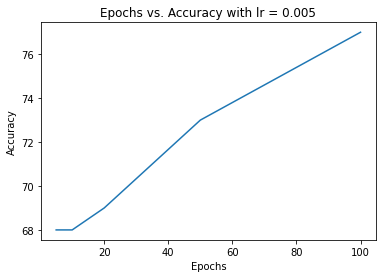

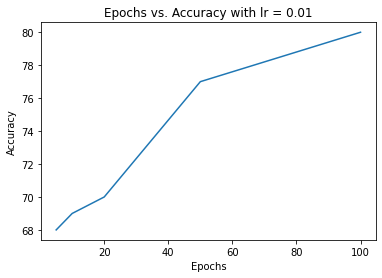

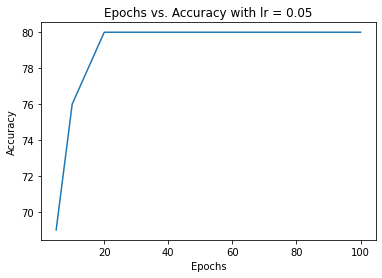

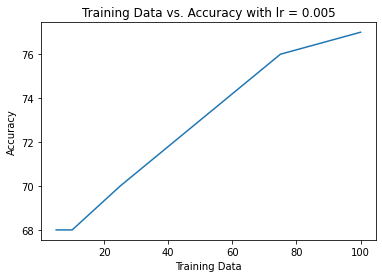

In [7]:
#Plot Hyperparameter Combinations (Changing Hyperparameters)
import matplotlib.pyplot as plt
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5,10,25,50,75,100]
num_epochs = [5,10,20,50,100]
lr_list = [0.005,0.01,0.05]
#empty arrays for graphs
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
for i in range(len(num_epochs)): #create plot for epoch vs accuracy with lr=0.005
  percent_tr = instances_tr[int(len(instances_tr)*((100-tr_percent[5])/100)):] #hold percent constant
  epochs = num_epochs[i] #change epoch
  lr = lr_list[0]
  weights = train_perceptron(percent_tr, lr, epochs)
  accuracy = get_accuracy(weights, instances_te)
  x1.append(num_epochs[i])
  y1.append(accuracy)
#plot setup
plt.plot(x1,y1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs. Accuracy with lr = 0.005")
plt.show()

for j in range(len(num_epochs)): #create plot for epoch vs accuracy with lr=0.01
  percent_tr = instances_tr[int(len(instances_tr)*((100-tr_percent[5])/100)):] #hold percent constant
  epochs = num_epochs[j] #change epoch
  lr = lr_list[1] #lr=0.01
  weights = train_perceptron(percent_tr, lr, epochs)
  accuracy = get_accuracy(weights, instances_te)
  x2.append(num_epochs[j])
  y2.append(accuracy)
#plot setup
plt.plot(x2,y2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs. Accuracy with lr = 0.01")
plt.show()

for k in range(len(num_epochs)): #create plot for epoch vs accuracy with lr=0.05
  percent_tr = instances_tr[int(len(instances_tr)*((100-tr_percent[5])/100)):] #hold percent constant
  epochs = num_epochs[k] #change epoch
  lr = lr_list[2] #lr=0.05
  weights = train_perceptron(percent_tr, lr, epochs)
  accuracy = get_accuracy(weights, instances_te)
  x3.append(num_epochs[k])
  y3.append(accuracy)
#plot setup
plt.plot(x3,y3)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs. Accuracy with lr = 0.05")
plt.show()
#empty arrays
t1 = []
t2= []

for z in range(len(tr_percent)): #create plot for learning rate vs accuracy with lr=0.005
  percent_tr = instances_tr[int(len(instances_tr)*((100-tr_percent[z])/100)):] #change percent
  epochs = num_epochs[4] #hold epoch constant
  lr = lr_list[0] #lr=0.005
  weights = train_perceptron(percent_tr, lr, epochs)
  accuracy = get_accuracy(weights, instances_te)
  t1.append(tr_percent[z])
  t2.append(accuracy)
#plot setup
plt.plot(t1,t2)
plt.xlabel("Training Data")
plt.ylabel("Accuracy")
plt.title("Training Data vs. Accuracy with lr = 0.005")
plt.show()